In [100]:
### Import necessaey packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
### Importing warnings, suppressing all warning messages
import warnings
warnings.filterwarnings("ignore")

### Setting the background of the plot to be whitegrid
sns.set(style="whitegrid")

Section 1: Exploratory Data Analysis

In [102]:
### Reading the data files
df = pd.read_csv("AIML Dataset.csv")

In [103]:
### Read the data frame
### Display the first 10 rows
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [104]:
### Getting the data structures
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [105]:
### Getting the columns of the dataset
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [106]:
### Counting the total number of frauds
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [107]:
### Counting the accuracy of the fraud number
df['isFlaggedFraud'].value_counts()

# Findings: Only a small number of transactions is flagged fraud

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [108]:
### Checking whether there is any null values
df.isnull().sum().sum()

# No null values

0

In [109]:
### Checking the dimension of the dataset
df.shape

(6362620, 11)

In [110]:
### Computing the percentage of fraud observed
### Checking whether there is a class imbalance when training the data
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,3)

# Only 12.9% of the dataset is flagged fraud, class imbalance problem

0.129

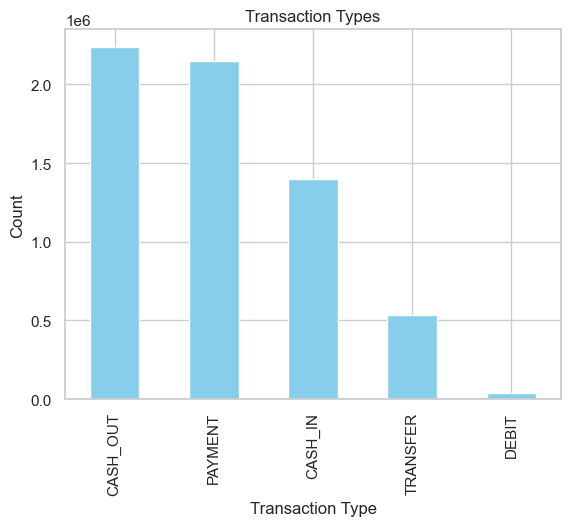

In [111]:
### Plotting the transaction types 
df["type"].value_counts().plot(kind='bar',title='Transaction Types',color='skyblue')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

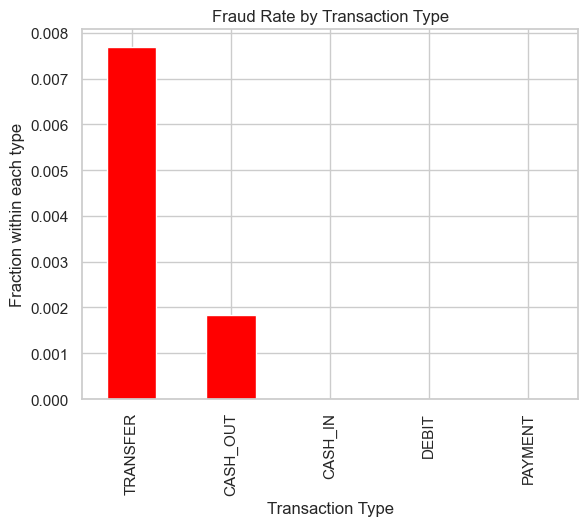

In [112]:
### Fraud rates by types
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type

fraud_by_type.plot(kind='bar',title='Fraud Rate by Transaction Type',color='red')
plt.xlabel("Transaction Type")
plt.ylabel("Fraction within each type")
plt.show()


# Only transfer and cash out has the occurence of fraud
# Transfer has the highest rate of fraud happening


In [113]:
### Checking the fraud amount
## Convert the data type to integer for easy interpretation
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

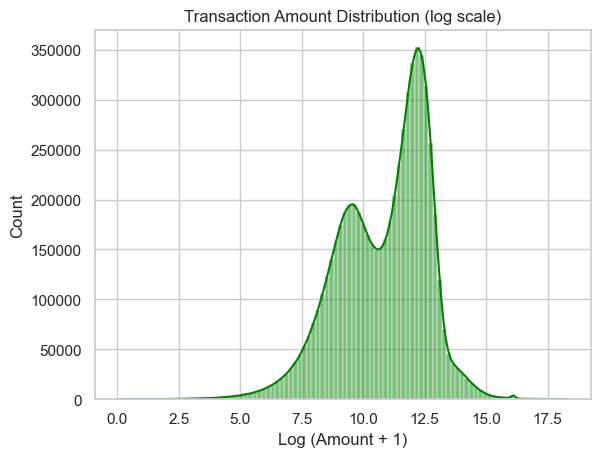

In [114]:
### Plot the amount out to check the outlier and the distribution
amount = df['amount']

### Using log(1+p) scale, compresses large values, spreads out small ones
## We set kde = True to provide a smoother distribution
sns.histplot(np.log1p(amount), bins = 100, kde=True, color='green')
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log (Amount + 1)")
plt.show()

# Most of the transaction occurs at the amount of exp(12.5)-1 = 268,337

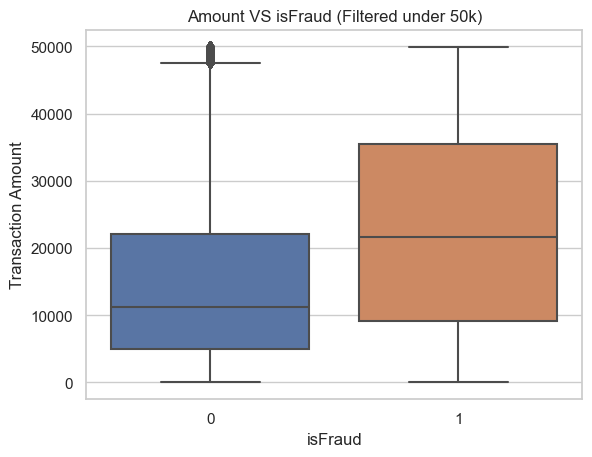

In [115]:
### Plotting the box plot for the amount less than 50000

sns.boxplot(data=df[df['amount']<50000],x ="isFraud",y="amount")
plt.title("Amount VS isFraud (Filtered under 50k)")
plt.xlabel("isFraud")
plt.ylabel("Transaction Amount")
plt.show()

# Under 50K, the median, Q1 and Q3 are higher transaction amount in fraudulent transaction
# On average, fraudulent activities normally involve higher transaction amount

In [116]:
### Checking the consistencies between balances in the origin and destination account
### Verify transaction consistency - if not consistent, there is fraud
### See whether we flag the number of fraud correctly

df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [117]:
# Less than 0, means balance increase after transaction (weird)
(df["balanceDiffOrig"] < 0).sum()

1399253

In [118]:
# Less than 0, means fraud occurs (no receive money in destination)
(df["balanceDiffDest"] < 0).sum()

1238864

In [119]:
### Plotting the number of fraud occuring every time
df.head(2)

# Step represent the day number

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


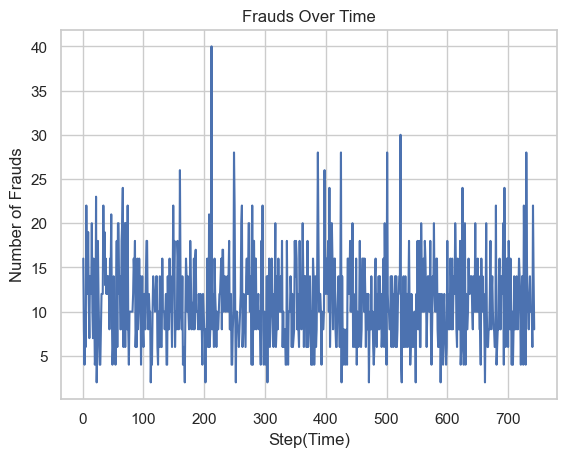

In [120]:
### Plotting the fraudulent every day, over time

frauds_per_step = df[df["isFraud"]==1]["step"].value_counts().sort_index()
frauds_per_step
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Fraud per Step")
plt.xlabel("Step(Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [121]:
### Now drop the number of days since it does not matter
df.drop(columns='step',inplace=True,axis=1)

In [122]:
### Checking the current dataframe
df.head(5)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [123]:
### Now identify the top senders and the top receivers
### Might be the fraudulent account since they transfer the most
top_senders = df["nameOrig"].value_counts().sort_values(ascending=False).head(10)
top_senders

C1902386530    3
C2098525306    3
C363736674     3
C1530544995    3
C1065307291    3
C2051359467    3
C1832548028    3
C400299098     3
C1976208114    3
C1999539787    3
Name: nameOrig, dtype: int64

In [ ]:
top_receivers = df["nameDest"].value_counts().sort_values(ascending=False).head(10)
top_receivers

# There is a mismatch between the numbers of top senders and top receivers
# A lot of transactions happening to the same receiver account

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

In [ ]:
### Noe we want to filter for those who experience fraud

fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().sort_values(ascending=False).head(10)
fraud_users

### There is no an account that repeatedly involved in fraudulent activity

C1305486145    1
C2032147559    1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: nameOrig, dtype: int64

In [72]:
### Based on the bar chart above, transaction and cash out has the highest
### fraudulent rate.

fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [73]:
fraud_types.head(5)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [ ]:
fraud_types["type"].value_counts()

# Cash out has a higher fraudulent cause than transfer

CASH_OUT    2237500
TRANSFER     532909
Name: type, dtype: int64

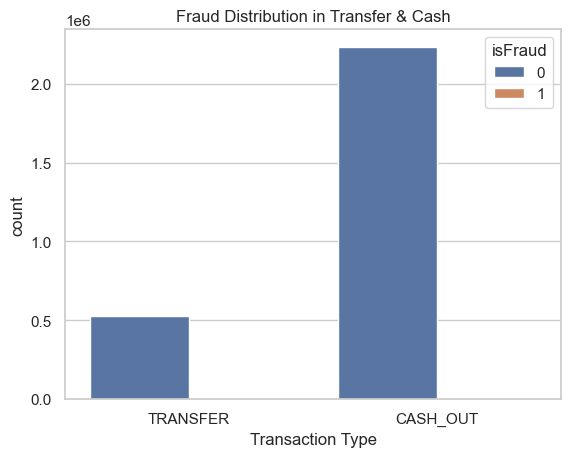

In [ ]:
### Create a count plot
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash")
plt.xlabel("Transaction Type")
plt.show()

# We have a very low counts of fraudulent transactions,
# Hence the orange does not show up

In [83]:
### Correlation matrix
# Check the correlation between the transaction amount and other balances
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()
corr

# Pretty low correlation between amount and other balances

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


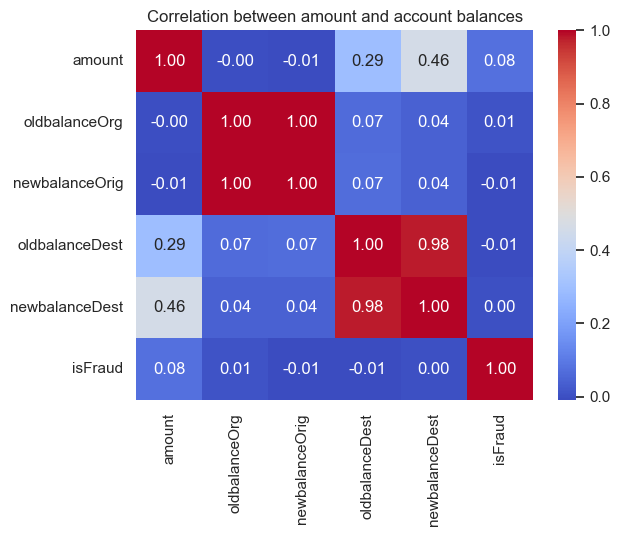

In [ ]:
### Visualize with heatmap
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt="0.2f")
plt.title("Correlation between amount and account balances")
plt.show()

# The correlation between isFraud and amount is very low
# Correlation does not bring us a lot of valuable information

In [ ]:
### Checking the account that become 0 after transfer
### It means that they transfer all their account out
### Very terrible

zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [89]:
len(zero_after_transfer)

1188074

In [90]:
zero_after_transfer.head(5)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


Section 2: Feature Engineering & Training a ML Model

In [135]:
### Import necessary modules
### Building a machine learning model pipeline

from sklearn.model_selection import train_test_split # split into train and test
from sklearn.preprocessing import StandardScaler # standardized values
from sklearn.linear_model import LogisticRegression # predict probabilities (fraud or not)
from sklearn.metrics import classification_report, confusion_matrix # performance metrics
from sklearn.pipeline import Pipeline # connect the process
from sklearn.compose import ColumnTransformer # scale numeric, encode categorical
from sklearn.preprocessing import OneHotEncoder # convert category into binary

In [92]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   type             object 
 1   amount           float64
 2   nameOrig         object 
 3   oldbalanceOrg    float64
 4   newbalanceOrig   float64
 5   nameDest         object 
 6   oldbalanceDest   float64
 7   newbalanceDest   float64
 8   isFraud          int64  
 9   isFlaggedFraud   int64  
 10  balanceDiffOrig  float64
 11  balanceDiffDest  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 582.5+ MB


In [125]:
### Drop some columns
df_model = df.drop(columns=["nameOrig","nameDest","isFlaggedFraud"],axis=1)
# axis = 1, drop the columns in the column direction

In [126]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [127]:
### Categorizing the columns
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [131]:
y = df_model["isFraud"]
X = df_model.drop(columns="isFraud",axis=1)

In [132]:
### Making training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)
# We split 30% data in testing set
# stratify, ensure the labels of y are distributed evenly in both testing and training
# Avoid imbalance class

In [ ]:
### Preprocessing and standardizing data
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numeric), #nametag, transformer, columns
        ("cat", OneHotEncoder(drop='first'),categorical) #drop the first category
    ],
    remainder = "drop" #drop the other columns not specify in numeric and categorical
)

In [ ]:
### Creating model pipeline
### Use pipeline to combine all mechanisms

pipeline = Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000)) #Iteration in guessing coefficient
])

In [143]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [145]:
y_pred = pipeline.predict(X_test)
len(y_pred)

1908786

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [ ]:
confusion_matrix(y_test,y_pred)
# TN, FP
# FN, TP

# High specificity: predicted negative correctly
# Moderate sensitivity: predicted the positive correctly
# High false positive rate, predicted as positive which in fact negative
# Perform well in having low false negative

array([[1802717,  103605],
       [    135,    2329]])

In [149]:
pipeline.score(X_test,y_test) * 100

# Accuracy, the proportion of correct prediction
# Predict high, so we are good with the model above

94.56513197393527

In [150]:
### Exporting the pipeline
import joblib

joblib.dump(pipeline,"fraud_detection_pipeline_pkl")

['fraud_detection_pipeline_pkl']